In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import linear_model, decomposition, datasets
from sklearn import svm
import math
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 10000)
parkingdata.size

130000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
11165281,RACV,BOURKE STREET,WILLIAM STREET,QUEEN STREET,3,2424N,29/08/2012 07:23:22 PM,29/08/2012 07:24:44 PM,82,1P MTR M-SAT 7:30-19:30,0,123,6969
4621025,Rialto,KING STREET,FLINDERS LANE,FLINDERS STREET,2,1396E,12/02/2012 07:30:24 AM,12/02/2012 07:31:52 AM,88,2P SUN 7:30-18:30,0,839,875
6398181,The Mac,ELIZABETH STREET,A'BECKETT STREET,LA TROBE STREET,5,4373W,05/04/2012 10:33:22 AM,05/04/2012 10:40:07 AM,405,1/2P MTR M-SAT 7:30-19:30,0,627,3284
7126537,Spencer,FRANCIS STREET,SPENCER STREET,KING STREET,3,2094N,30/04/2012 01:01:29 PM,30/04/2012 01:24:09 PM,1360,1/2P MTR M-SAT 7:30-19:30,0,679,1236
5251111,Queensberry,ERROL STREET,QUEENSBERRY STREET,VICTORIA STREET,2,10184E,01/03/2012 04:42:29 PM,01/03/2012 04:43:51 PM,82,1P TKT A M-F 7:30-18:30,0,641,3456


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3980073,Princes Theatre,Lt BOURKE STREET,RUSSELL STREET,EXHIBITION STREET,4,2529S,24/01/2012 01:13:23 AM,24/01/2012 01:59:50 AM,2787,1P AOT M-SAT 0:00-7:30,0,907,1305
9632700,The Mac,ELIZABETH STREET,Lt LONSDALE STREET,LONSDALE STREET,5,959W,14/07/2012 11:49:54 AM,14/07/2012 12:13:59 PM,1445,1/2P M-SAT 7:30-19:30,0,627,5220
1520909,Queensberry,CAPEL STREET,VICTORIA STREET,WILLIAM STREET,1,C5706,12/11/2011 07:50:57 AM,12/11/2011 09:21:33 AM,5436,2P MTR M-SAT 7:30-18:30,0,163,2558
2418198,Rialto,KING STREET,BOURKE STREET,Lt COLLINS STREET,2,1450E,06/12/2011 07:12:16 PM,06/12/2011 07:13:21 PM,65,1/2P MTR M-F 19:00-19:30,0,839,808
4403765,County,SPENCER STREET,LONSDALE STREET,Lt BOURKE STREET,5,1549W,05/02/2012 11:09:33 PM,05/02/2012 11:20:30 PM,657,P/ 5 M-SUN 0:00-23:59,1,1285,918


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1006
Victoria Market     730
Princes Theatre     715
Southbank           696
Regency             667
The Mac             619
Hyatt               575
Titles              541
Hardware            439
Rialto              428
City Square         428
Chinatown           412
County              407
Spencer             395
Courtney            382
Magistrates         367
Banks               330
RACV                326
Jolimont            277
Supreme             168
Tavistock            45
Docklands            44
West Melbourne        3
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
11165281,RACV,BOURKE STREET,WILLIAM STREET,QUEEN STREET,3,2424N,29/08/2012 07:23:22 PM,29/08/2012 07:24:44 PM,82,1P MTR M-SAT 7:30-19:30,0,123,6969
4621025,RIALTO,KING STREET,FLINDERS LANE,FLINDERS STREET,2,1396E,12/02/2012 07:30:24 AM,12/02/2012 07:31:52 AM,88,2P SUN 7:30-18:30,0,839,875
6398181,THE MAC,ELIZABETH STREET,A'BECKETT STREET,LA TROBE STREET,5,4373W,05/04/2012 10:33:22 AM,05/04/2012 10:40:07 AM,405,1/2P MTR M-SAT 7:30-19:30,0,627,3284
7126537,SPENCER,FRANCIS STREET,SPENCER STREET,KING STREET,3,2094N,30/04/2012 01:01:29 PM,30/04/2012 01:24:09 PM,1360,1/2P MTR M-SAT 7:30-19:30,0,679,1236
5251111,QUEENSBERRY,ERROL STREET,QUEENSBERRY STREET,VICTORIA STREET,2,10184E,01/03/2012 04:42:29 PM,01/03/2012 04:43:51 PM,82,1P TKT A M-F 7:30-18:30,0,641,3456


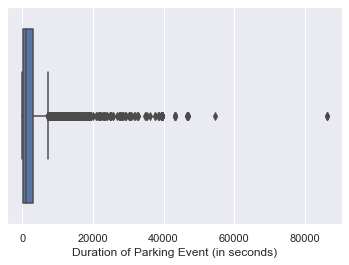

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])

In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             877
QUEEN STREET                803
EXHIBITION STREET           598
FRANKLIN STREET             561
LA TROBE STREET             535
COLLINS STREET              520
ELIZABETH STREET            516
RUSSELL STREET              479
BOURKE STREET               411
LT LONSDALE STREET          358
LT COLLINS STREET           282
SPRING STREET               281
KING STREET                 268
FLINDERS LANE               249
ERROL STREET                236
WILLIAM STREET              195
LT BOURKE STREET            180
COVENTRY STREET             175
A'BECKETT STREET            159
VICTORIA STREET             145
FLINDERS STREET             137
QUEENSBERRY STREET          116
SPENCER STREET              112
CAPEL STREET                108
DORCAS STREET               106
GRANT STREET                 96
THERRY STREET                95
LEVESON STREET               89
ALBERT STREET                89
KAVANAGH STREET              83
COBDEN STREET                68
O'CONNEL

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            889
QUEEN STREET           752
QUEENSBERRY STREET     639
WILLIAM STREET         604
RUSSELL STREET         509
SPENCER STREET         501
SWANSTON STREET        500
LT LONSDALE STREET     469
EXHIBITION STREET      448
LONSDALE STREET        406
LT COLLINS STREET      344
VICTORIA STREET        318
BOURKE STREET          301
LT BOURKE STREET       267
COLLINS STREET         259
ELIZABETH STREET       240
FLINDERS LANE          213
WILLAM STREET          163
LA TROBE STREET        162
THERRY STREET          156
A'BECKETT STREET       142
WELLS STREET           139
FRANKLIN STREET        123
DODDS STREET           119
SOUTHBANK BOULEVARD    100
KINGS WAY               96
FLINDERS STREET         90
STURT STREET            90
O'CONNELL STREET        88
ERROL STREET            80
PELHAM STREET           68
BALSTON STREET          65
VICTORIA PARADE         64
ALBERT STREET           53
PEEL STREET             49
HOWARD STREET           47
COBDEN STREET           40
N

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET        829
VICTORIA STREET       809
ELIZABETH STREET      781
QUEEN STREET          755
EXHIBITION STREET     505
KING STREET           501
LONSDALE STREET       499
SPRING STREET         453
RUSSELL STREET        407
LT BOURKE STREET      406
FLINDERS LANE         349
COLLINS STREET        344
LT COLLINS STREET     301
BOURKE STREET         267
LA TROBE STREET       267
SWANSTON STREET       240
FLINDERS STREET       213
LT LONSDALE STREET    196
FRANKLIN STREET       156
DODDS STREET          150
ST KILDA ROAD         139
QUEENSBERRY STREET    101
POWER STREET           90
WELLS STREET           87
LANSDOWNE STREET       84
LEVESON STREET         80
THERRY STREET          76
HAWKE STREET           74
A'BECKETT STREET       63
STURT STREET           55
MILES STREET           55
WALSH STREET           43
CAPEL STREET           42
ELM STREET             39
GISBORNE STREET        38
KAVANAGH STREET        35
DUDLEY STREET          33
STANLEY STREET         31
CATHEDRAL PL

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
11165281,RACV,BOURKE STREET,WILLIAM STREET,QUEEN STREET,3,2424N,2012-08-29 19:23:22,2012-08-29 19:24:44,82,1P MTR M-SAT 7:30-19:30,0,123,6969
4621025,RIALTO,KING STREET,FLINDERS LANE,FLINDERS STREET,2,1396E,2012-12-02 07:30:24,2012-12-02 07:31:52,88,2P SUN 7:30-18:30,0,839,875
6398181,THE MAC,ELIZABETH STREET,A'BECKETT STREET,LA TROBE STREET,5,4373W,2012-05-04 10:33:22,2012-05-04 10:40:07,405,1/2P MTR M-SAT 7:30-19:30,0,627,3284
7126537,SPENCER,FRANCIS STREET,SPENCER STREET,KING STREET,3,2094N,2012-04-30 13:01:29,2012-04-30 13:24:09,1360,1/2P MTR M-SAT 7:30-19:30,0,679,1236
5251111,QUEENSBERRY,ERROL STREET,QUEENSBERRY STREET,VICTORIA STREET,2,10184E,2012-01-03 16:42:29,2012-01-03 16:43:51,82,1P TKT A M-F 7:30-18:30,0,641,3456


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3980073,PRINCES THEATRE,LT BOURKE STREET,RUSSELL STREET,EXHIBITION STREET,4,2529S,2012-01-24 01:13:23,2012-01-24 01:59:50,2787,1P AOT M-SAT 0:00-7:30,0,907,1305
9632700,THE MAC,ELIZABETH STREET,LT LONSDALE STREET,LONSDALE STREET,5,959W,2012-07-14 11:49:54,2012-07-14 12:13:59,1445,1/2P M-SAT 7:30-19:30,0,627,5220
1520909,QUEENSBERRY,CAPEL STREET,VICTORIA STREET,WILLIAM STREET,1,C5706,2011-12-11 07:50:57,2011-12-11 09:21:33,5436,2P MTR M-SAT 7:30-18:30,0,163,2558
2418198,RIALTO,KING STREET,BOURKE STREET,LT COLLINS STREET,2,1450E,2011-06-12 19:12:16,2011-06-12 19:13:21,65,1/2P MTR M-F 19:00-19:30,0,839,808
4403765,COUNTY,SPENCER STREET,LONSDALE STREET,LT BOURKE STREET,5,1549W,2012-05-02 23:09:33,2012-05-02 23:20:30,657,P/ 5 M-SUN 0:00-23:59,1,1285,918


### SVM Classification Model on Predicitive Analytics question 2

In [19]:
#Target field identification
duration = parkingdata['Duration of Parking Event (in seconds)'].copy()

print('Minimum parking duration (seconds): ' + str(duration.min()))
print('Maximum parking duration (seconds): ' + str(duration.max()))
print('\nMinimum parking duration (hour): ' + str(duration.min()/3600))
print('Maximum parking duration (hour): ' + str(duration.max()/3600))
print('\nMinimum parking duration is under [' + str(math.trunc(duration.min()/3600) + 1) + '] hours')
print('Maximum parking duration is under [' + str(math.trunc(duration.max()/3600) + 1) + '] hours')

durList = []
static = 1
df = pd.DataFrame()

for record in duration.values:
    hour = 3600
    index = 0
    while static == 1:
        if record < hour:
#             print("\nDuration in seconds: " + str(record))
            data = math.trunc(record/3600) + 1
            durList.append(data)
#             print("Duration is under " + str(data) + " hours")
            break
        else:
            hour += 3600

df.insert(0, 'Duration (Hours)', durList, True)
target = df['Duration (Hours)']
target.head(10)

Minimum parking duration (seconds): 19
Maximum parking duration (seconds): 86254

Minimum parking duration (hour): 0.005277777777777778
Maximum parking duration (hour): 23.959444444444443

Minimum parking duration is under [1] hours
Maximum parking duration is under [24] hours


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Duration (Hours), dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('In Violation?', axis = 1, inplace = True)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['In Violation?'] = parkingdata['In Violation?']
features['Side Of Street'] = parkingdata['Side Of Street']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Sign,In Violation?,Side Of Street,Street ID,Device ID,Arrival Hour,Departure Hour
11165281,0,0,0,0,0,0,3,123,6969,19,19
4621025,1,1,1,1,1,0,2,839,875,7,7
6398181,2,2,2,2,2,0,5,627,3284,10,10
7126537,3,3,3,3,2,0,3,679,1236,13,13
5251111,4,4,4,4,3,0,2,641,3456,16,16
1104410,5,5,5,5,4,0,3,528,1024,18,18
5787742,6,6,6,6,0,0,1,1346,3757,15,16
385212,2,2,7,7,0,0,2,627,3361,12,12
6612267,3,7,3,3,5,0,4,911,1239,9,9
3856473,7,2,4,4,6,0,2,627,3188,8,8


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
param_grid = {'C': np.logspace(-4, 4, 20), 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
             'max_iter' : [100, 1000, 2500, 5000]}

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 5, 
                                    n_repeats = 1, 
                                    random_state = 1)
        

clf_GS = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv = cv_method, verbose=True, scoring = 'accuracy', return_train_score = True, n_jobs=-1)

In [23]:
#Fit the model with the dataset
best_clf = clf_GS.fit(features, target)
#LogisticRegression().get_params().keys()

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 46.

In [24]:
clf_GS.best_params_

{'C': 4.281332398719396, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 5000}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_gamma = best_clf.best_estimator_.get_params()['gamma']
best_C = best_clf.best_estimator_.get_params()['C']
best_max =  best_clf.best_estimator_.get_params()['max_iter']
best_kernel =  best_clf.best_estimator_.get_params()['kernel']

print('Best gamma:', best_gamma)
print('Best C:', best_C)
print('Best max iteration:', best_max)
print('Best kernel:', best_kernel)

Best gamma: 1
Best C: 4.281332398719396
Best max iteration: 5000
Best kernel: rbf


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_svm = pd.DataFrame(clf_GS.cv_results_['params'])
results_svm['test_score'] = clf_GS.cv_results_['mean_test_score']
results_svm

,C,gamma,kernel,max_iter,test_score
0,0.000100,1.000,rbf,100,0.3197
1,0.000100,1.000,rbf,1000,0.7023
2,0.000100,1.000,rbf,2500,0.8019
3,0.000100,1.000,rbf,5000,0.8019
4,0.000100,1.000,poly,100,0.1195
5,0.000100,1.000,poly,1000,0.2620
6,0.000100,1.000,poly,2500,0.2755
7,0.000100,1.000,poly,5000,0.1969
8,0.000100,1.000,sigmoid,100,0.8019
9,0.000100,1.000,sigmoid,1000,0.8019


In [27]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
SVM = metric = SVC(  C = best_C,
                               gamma = best_gamma, 
                               kernel = best_kernel, 
                               max_iter = best_max 
                               )

In [28]:
# Hill climbing w/ SVM
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = SVM.fit(x_train, y_train)
    cur_Score = SVM.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.797
Score with 2 selected features: 0.7985
Score with 3 selected features: 0.7995
Score with 4 selected features: 0.8
Score with 5 selected features: 0.8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Score with 6 selected features: 0.8365

Indexs of the desired features
[2, 3, 1, 0, 7, 5]


In [29]:
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 1,Between Street 2,Street Name,Area Name,Street ID,In Violation?
11165281,0,0,0,0,123,0
4621025,1,1,1,1,839,0
6398181,2,2,2,2,627,0
7126537,3,3,3,3,679,0
5251111,4,4,4,4,641,0
1104410,5,5,5,5,528,0
5787742,6,6,6,6,1346,0
385212,7,7,2,2,627,0
6612267,3,3,7,3,911,0
3856473,4,4,2,7,627,0


In [30]:
bestModel = clf_GS.fit(features_hc, target)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 18.

In [31]:
clf_GS.best_params_

{'C': 11.288378916846883, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 2500}

In [32]:
#Find the best values for the  parameters of the model (Formatted output)
best_gamma = best_clf.best_estimator_.get_params()['gamma']
best_C = best_clf.best_estimator_.get_params()['C']
best_max =  best_clf.best_estimator_.get_params()['max_iter']
best_kernel =  best_clf.best_estimator_.get_params()['kernel']

print('Best gamma:', best_gamma)
print('Best C:', best_C)
print('Best max iteration:', best_max)
print('Best kernel:', best_kernel)

Best gamma: 0.1
Best C: 11.288378916846883
Best max iteration: 2500
Best kernel: rbf


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset
results_svm = pd.DataFrame(clf_GS.cv_results_['params'])
results_svm['test_score'] = clf_GS.cv_results_['mean_test_score']
results_svm

,C,gamma,kernel,max_iter,test_score
0,0.000100,1.000,rbf,100,0.8041
1,0.000100,1.000,rbf,1000,0.8291
2,0.000100,1.000,rbf,2500,0.8019
3,0.000100,1.000,rbf,5000,0.8019
4,0.000100,1.000,poly,100,0.4205
5,0.000100,1.000,poly,1000,0.1713
6,0.000100,1.000,poly,2500,0.3011
7,0.000100,1.000,poly,5000,0.2944
8,0.000100,1.000,sigmoid,100,0.8019
9,0.000100,1.000,sigmoid,1000,0.8019


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
SVM = metric = SVC(  C = best_C,
                               gamma = best_gamma, 
                               kernel = best_kernel, 
                               max_iter = best_max 
                               )

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:76: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


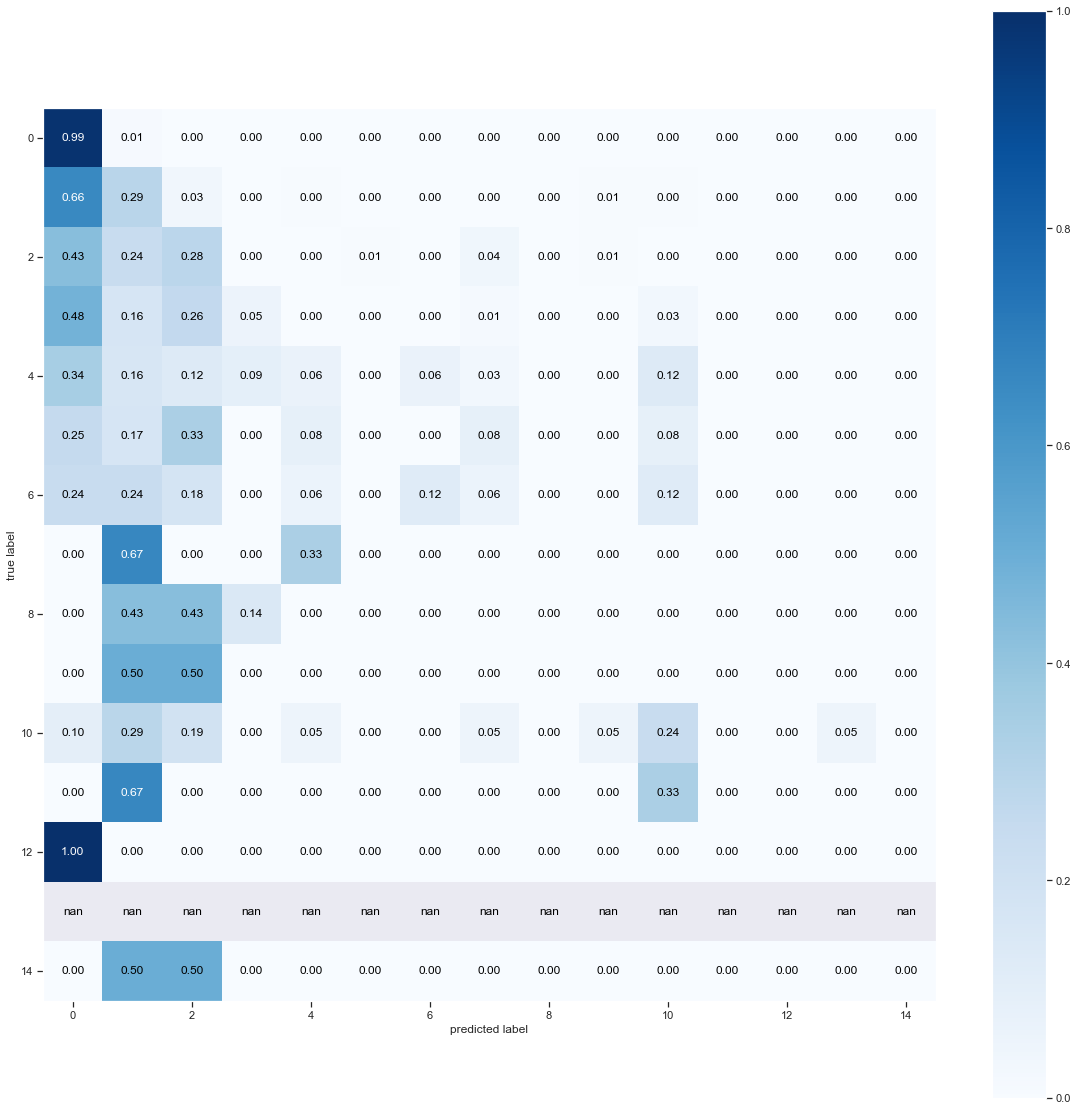

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
SVM.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = SVM.predict(x_test)
cm = metrics.confusion_matrix(y_test,predicted)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                               figsize=(20, 20))
plt.show()

In [36]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           1       0.88      0.99      0.93      4014
           2       0.63      0.29      0.40       672
           3       0.35      0.28      0.31       138
           4       0.40      0.05      0.10        73
           5       0.22      0.06      0.10        32
           6       0.00      0.00      0.00        12
           7       0.50      0.12      0.19        17
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         2
          11       0.28      0.24      0.26        21
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         2

    accuracy                           0.84      5000
   macro avg       0.22      0.14      0.15      5000
weighted avg       0.81   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
def accuracy(cm):
    diagonal_sum = cm.trace()
    sum_of_all_elements = cm.sum()
    return diagonal_sum / sum_of_all_elements 
print("\n Accuracy score: {:.5f}".format(accuracy(cm)))



 Accuracy score: 0.84100


In [38]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    SVM.fit(x_train, y_train)
    kFoldTotal += SVM.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, SVM.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[fold 0] score: 0.84150


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[fold 1] score: 0.84500


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[fold 2] score: 0.84000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[fold 3] score: 0.83500
[fold 4] score: 0.84050

KNN mean score [5 folds] = 0.8404
